In [21]:
# Ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00']

# Load data
data = pd.read_csv('data/glass.csv')

# Get data headers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [22]:
clean_data = data.copy()

# Rename the outcome column to poisonous and non-poisonous
clean_data['Type'] = clean_data['Type'].replace(
    {1: 'Building',
     4: 'Vehicle Window',
     5: 'Container',
     6: 'Tableware',
     7: 'Headlamp'
    })

In [23]:
# Separate out classfiers
X = data.copy().drop(columns=['Type'])
y = data.copy()['Type']

# Normalize data
ss = StandardScaler()
ss.fit(X)
X[:] = ss.transform(X)

#### Preparing the data
`train_test_split` to create the training and testing data 

In [24]:
# Split data for train and test
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0,)

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

#print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))


DecisionTreeClassifier()

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train,y_train)

print("Test Accuracy: {}%".format(round(rf.score(x_test,y_test)*100,2)))


Test Accuracy: 70.37%


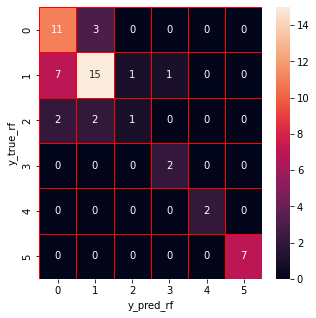

In [27]:
import seaborn as sns

y_pred_rf = rf.predict(x_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()